# Homework 9

## ASTR 5900, Fall 2017, University of Oklahoma

### Principal Components Analysis

# Problem 1

Load the iris data, which is a classic data set often used in machine learning examples.  It can be accessed via `sklearn` by calling `sklearn.datasets.load_iris`.  This returns an object whose attributes is what we are after: `object.data` is the data, `object.target` is the labels.

You will want to understand what these numbers mean. You should read up on the iris data here: https://archive.ics.uci.edu/ml/datasets/iris

Perform PCA from scratch on this data.  Print the principal components and the corresponding eigenvalues.  Determine the fraction of the variance contributed by each eigenvector.

Determine the 2 "most important" correlations and project the original data onto these components.  Plot the results using `matplotlib.pyplot`.  Color the new data points based on their target labels.

When you are done, answer the discussion prompt below.

In [17]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.datasets
temp = sklearn.datasets.load_iris()
data = temp.data.T

In [18]:
print data.shape
avg0=np.sum(data[0,:])/150.
avg1=np.sum(data[1,:])/150.
avg2=np.sum(data[2,:])/150.
avg3=np.sum(data[3,:])/150.
avg=np.asarray((avg0,avg1,avg2,avg3))
print avg

(4, 150)
[ 5.84333333  3.054       3.75866667  1.19866667]


In [19]:
data_new=np.zeros((4,150))
for i in range(150):
    for j in range(4):
        data_new[j,i]=data[j,i]-avg[j]
print data_new.shape
data=data_new
    

(4, 150)


In [20]:
x_xT = (1./150.) * np.dot(data,data.T)

eigvals, eigvecs = np.linalg.eig(x_xT)



P=eigvecs.T

print  P

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]


In [21]:
C_y = np.dot(np.dot(P,x_xT),P.T)
print C_y
e1=P[0,:]
e2=P[1,:]
e1=np.reshape(e1,(1,4))
e2=np.reshape(e2,(1,4))
print e1.shape
print "fraction of variance from first eigenvector = ", C_y[0,0]
print "fraction of variance from second eigenvector = ", C_y[1,1]
print "fraction of variance from third eigenvector = ", C_y[2,2]
print "fraction of variance from fourth eigenvector = ", C_y[3,3]

[[  4.19667516e+00  -2.63677968e-16  -1.11022302e-16  -2.22044605e-16]
 [ -2.10768902e-16   2.40628614e-01  -5.08273978e-16   1.70002901e-16]
 [ -2.89698820e-16  -5.23019128e-16   7.80004154e-02  -4.85722573e-17]
 [ -4.51028104e-17   2.00360561e-16   2.77555756e-17   2.35251403e-02]]
(1, 4)
fraction of variance from first eigenvector =  4.1966751632
fraction of variance from second eigenvector =  0.240628614483
fraction of variance from third eigenvector =  0.0780004153735
fraction of variance from fourth eigenvector =  0.0235251402785


(1, 150)
(1, 150)


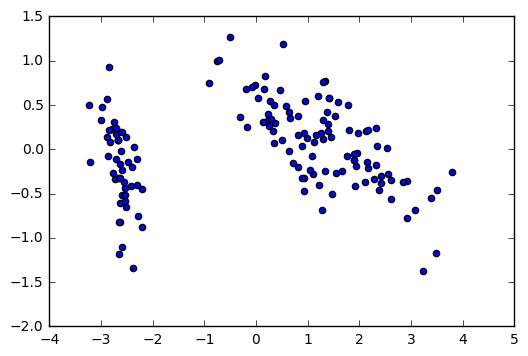

In [22]:
x=np.dot(e1,data)
y=np.dot(e2,data)
print x.shape
print y.shape
plt.scatter(x,y)
plt.show()

### Discussion

Comment on your results.  Interpret the principal components.  Remember the PCA did not use the target labels in its calculation.

Using the two most important eigenvectors created a subspace for the data that appears to accurately represent the whole data set. The data appears to be located in three clusters which correspond with the three types of data points (setosa, versicolor, virginica).

# Problem 2

You are to use `empca` on spectral data as in the lecture.  Information can be found here: https://github.com/sbailey/empca.  You can download the module from the same link.  In order to import `empca`, `empca.py` must be listed in your PYTHONPATH or located in the directory you are working in.

The data can be accessed in the class GitHub repository in `/data/quasar/`.  There are 3 .npy files containing the spectral data, data weights, and sampled wavelengths.  Each can be loaded by calling `numpy.load`.

The data containes fluxes and weights for 480 SDSS quasar spectra.
The data is already normalized; they were normalized by
dividing by the flux in an emission-line-free band near 1700
angstroms.  A power law model was used to subtract the continuum from
the accretion disk, leaving behind the emission line spectrum.  Thus,
you do not have to normalize them, but you do have to do the rest of
the analysis, e.g., detminining the weighed mean spectrum and
subtracting it.

### Part A

Load the data then subtract the weighted mean from each object.  Plot the mean data of each wavelength.

In [2]:
import empca
data=np.load('data.npy')
wavelengths=np.load('wavelengths.npy')
weights=np.load('weights.npy')

In [56]:
print data.shape[0]
print wavelengths.shape
print weights.shape


1801
(1801,)
(1801, 480)


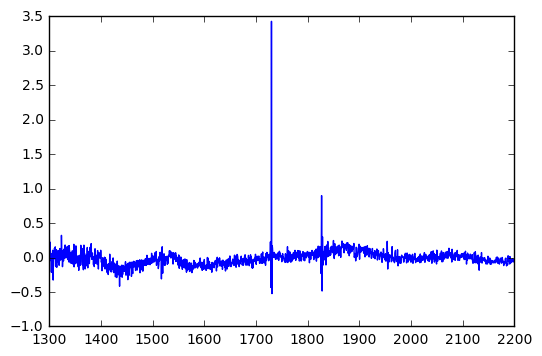

In [7]:
plt.plot(wavelengths,data[:,42])
plt.show()

In [23]:
print data.shape[0]

1801


In [27]:
import scipy.interpolate
from scipy.interpolate import interp1d




def GetWeightedMean(data,weights):
    meanout=np.zeros()

def GetWeightedMean(data,weights):
    meanout=np.zeros(data.shape[0])
    clustsize=data.shape[1]
    for i in range(0,data.shape[0]):
        datatemp=data[i,0:clustsize]
        weightstemp=weights[i,0:clustsize]
        meanout[i]=(np.sum(datatemp*weightstemp))/(np.sum(weightstemp))
    return meanout

def SubtractWeightedMean(data,mean):
    dataout=np.zeros([data.shape[0],data.shape[1]])
    clustsize=data.shape[1]
    meansize=mean.shape[0]
    for i in range(0,clustsize):
        dataout[0:meansize,i]=data[0:meansize,i]-mean[0:meansize]
    return dataout


(1801,)


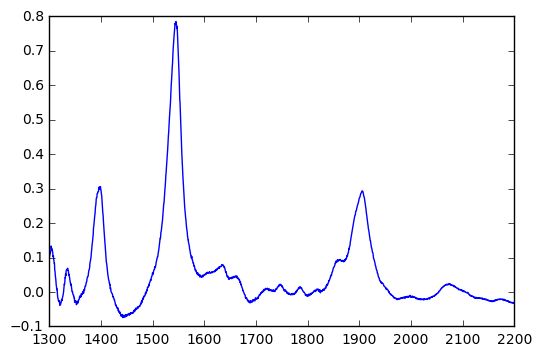

In [28]:
data_mean=GetWeightedMean(data,weights)
print data_mean.shape
plt.plot(wavelengths,data_mean)
plt.show()

In [31]:
data_sub=SubtractWeightedMean(data,data_mean)
print data_sub.shape

(1801, 480)


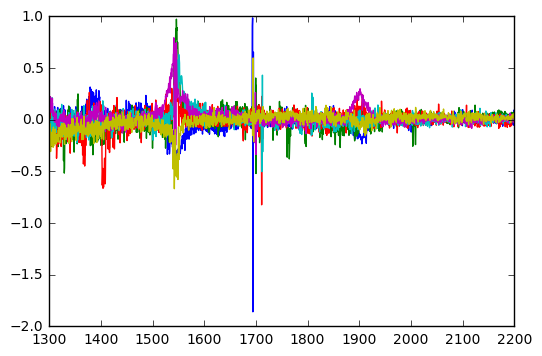

In [32]:
plt.plot(wavelengths,data_sub[:,0])
plt.plot(wavelengths,data_sub[:,10])
plt.plot(wavelengths,data_sub[:,20])
plt.plot(wavelengths,data_sub[:,30])
plt.plot(wavelengths,data_sub[:,40])
plt.plot(wavelengths,data_sub[:,50])
plt.show()

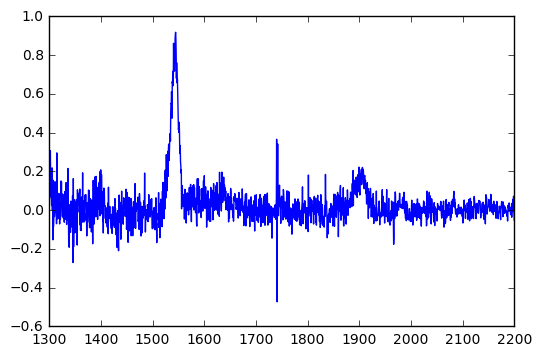

In [57]:
plt.plot(wavelengths,data_sub[:,400])
plt.show()

### Part B

Run `empca.empca` on the now subtracted data.  Construct a model with 25 components.  

Print the fraction of variance attributed to each eigenvector.

Plot the first 4 eigenvectors.

In [46]:
data_new=data_sub.T
print data_new.shape
weights_new=weights.T

(480, 1801)


In [47]:
from empca import empca
m=empca(data_new, weights=weights_new, niter=25, nvec=25, smooth=0, randseed=1, silent=False)

fractional=np.zeros(25)
for i in range(0,25):
    fractional[i]=m.R2vec(i)

       iter        R2             rchi2
EMPCA  1/25       0.03053714      4.15027054
EMPCA  2/25       0.46051962      2.43852748
EMPCA  3/25       0.77582621      0.96462124
EMPCA  4/25       0.82265041      0.70878050
EMPCA  5/25       0.83023892      0.66604324
EMPCA  6/25       0.83255788      0.65451668
EMPCA  7/25       0.83362415      0.64966539
EMPCA  8/25       0.83444809      0.64609794
EMPCA  9/25       0.83509515      0.64331951
EMPCA 10/25       0.83562557      0.64097343
EMPCA 11/25       0.83609098      0.63888188
EMPCA 12/25       0.83643556      0.63735268
EMPCA 13/25       0.83664677      0.63644342
EMPCA 14/25       0.83676614      0.63595210
EMPCA 15/25       0.83683435      0.63568751
EMPCA 16/25       0.83687570      0.63553818
EMPCA 17/25       0.83690265      0.63544783
EMPCA 18/25       0.83692151      0.63538851
EMPCA 19/25       0.83693560      0.63534584
EMPCA 20/25       0.83694677      0.63531198
EMPCA 21/25       0.83695613      0.63528253
EMPCA 22/25    

[ 0.54735886  0.12888628  0.04669708  0.03151642  0.01729439  0.01694494
  0.01129072  0.00808845  0.00640203  0.00449399  0.0044215   0.00288882
  0.00282663  0.00219596  0.00208667  0.00186997  0.00172713  0.00169989
  0.0015556   0.00121311  0.00127038  0.00122141  0.0010306   0.00091092
  0.00085941]
0.754458636432


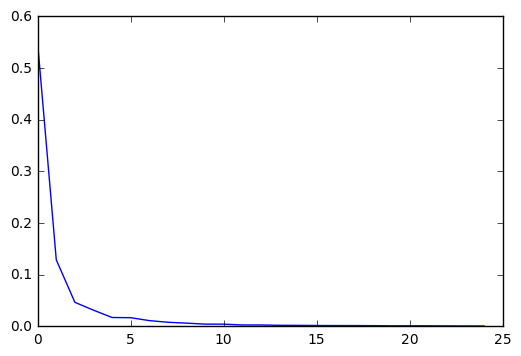

In [48]:
print fractional

print fractional[0:4].sum()

plt.plot(fractional)
plt.show()

In [49]:
print m.eigvec.shape


(25, 1801)


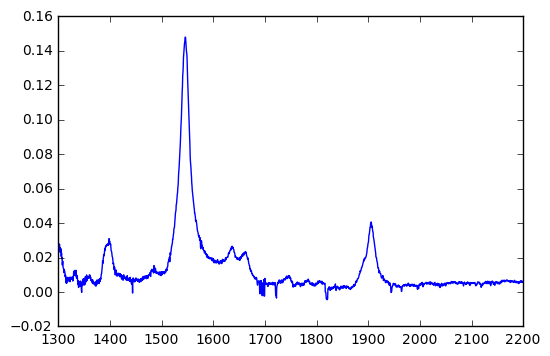

In [51]:
plt.plot(wavelengths,m.eigvec[0])
plt.show()


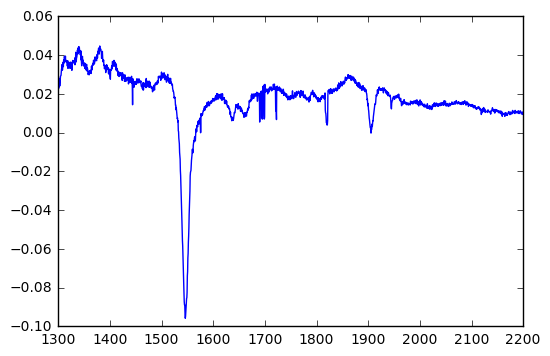

In [52]:
plt.plot(wavelengths,m.eigvec[1])
plt.show()

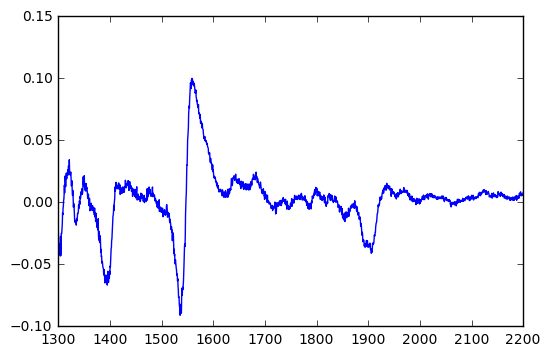

In [53]:
plt.plot(wavelengths,m.eigvec[2])
plt.show()

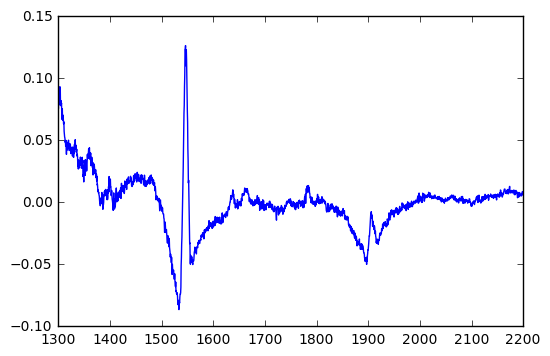

In [54]:
plt.plot(wavelengths,m.eigvec[3])
plt.show()

### Part C

Plot the 400th object in the data (index = 400, not 399).  "Reconstruct" this object by summing contributions from the first few principal components with the mean calculated in part A.  In other words: plot the mean over the 400th object, then plot the mean plus the contribution from the 1st principal component over the object, and so on.  Do this for the first 4 principal components.

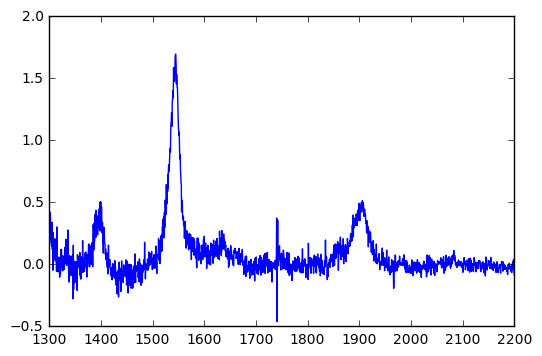

In [55]:
plt.plot(wavelengths,data[:,400])
plt.show()

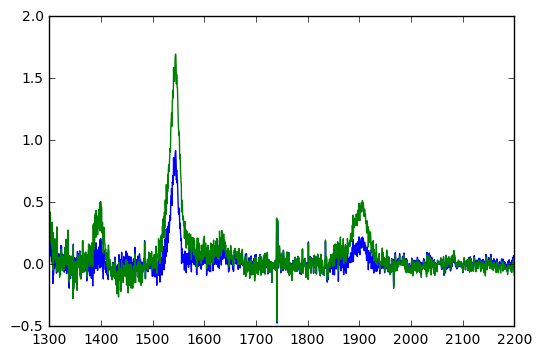

In [61]:
plt.plot(wavelengths,data_sub[:,400])
plt.plot(wavelengths,data[:,400])
plt.show()

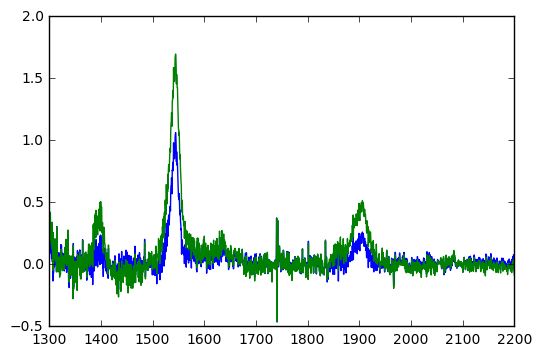

In [64]:
plt.plot(wavelengths,data_sub[:,400]+m.eigvec[0])
plt.plot(wavelengths,data[:,400])
plt.show()

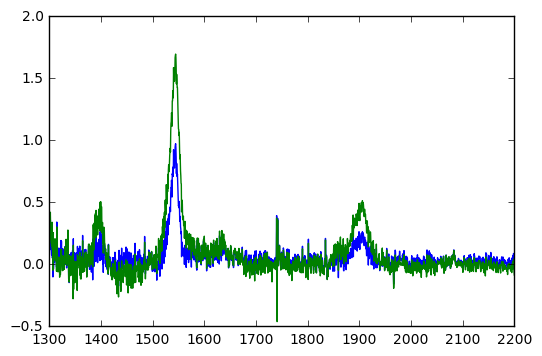

In [65]:
plt.plot(wavelengths,data_sub[:,400]+m.eigvec[0]+m.eigvec[1])
plt.plot(wavelengths,data[:,400])
plt.show()

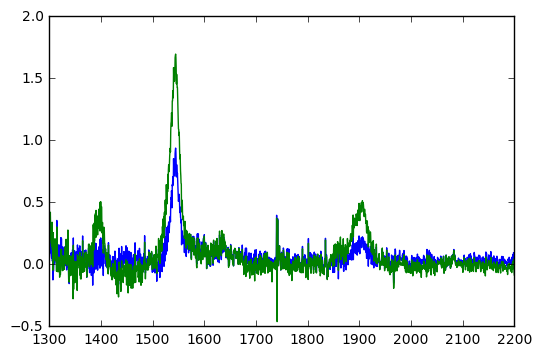

In [66]:
plt.plot(wavelengths,data_sub[:,400]+m.eigvec[0]+m.eigvec[1]+m.eigvec[2])
plt.plot(wavelengths,data[:,400])
plt.show()

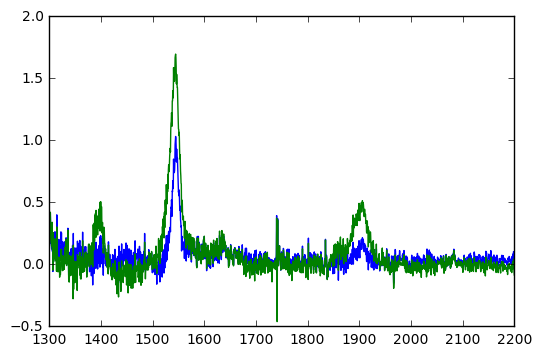

In [67]:
plt.plot(wavelengths,data_sub[:,400]+m.eigvec[0]+m.eigvec[1]+m.eigvec[2]+m.eigvec[3])
plt.plot(wavelengths,data[:,400])
plt.show()

# Problem Z

Comment on the time this assignment required.

This homework took about 4-5 hours